# Forced Gravity Waves
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/crayjake/fgw-python/blob/master/src/FGW.ipynb)

## IF COLAB RUN THE CELL BELOW

In [1]:
from google.colab import drive
drive.mount('/content/drive')


%cd /content/drive/My Drive/fgw-python/content
#! git clone 'https://github.com/crayjake/fgw-python.git'
! git pull

import sys
sys.path.insert(0,'/content/drive/My Drive/fgw-python/content/src')

ModuleNotFoundError: No module named 'google'

In [ ]:
# imports
import numpy as np

from generator import evaluate, simulate, convert, EulerStep, CrankNicolson, CrankNicolsonDeep, CrankNicolsonDeepDamped
from data import Meta

In [ ]:
# modes
js = np.array(list(range(1, 5)))
# heating
Qs = np.array([1] * len(js))
# heat time for each mode (only implemented in sim - large values mimic constant heating)
Ts = np.array([1e10] * len(js))

# f = 2 * 7.292 * (1e-5)
meta = Meta(Qs=Qs, js=js, Ts=Ts, time=60*60, dt=60, L=10000, D=50000, width=50, N=0.01, saveEvery=10)

Generating metadata:
Setting up space...
Creating matrices...


In [ ]:
# simulate and evaluate the data ( no z dep. )
simulationData = simulate(meta, CrankNicolsonDeepDamped)
#evaluationData = evaluate(meta)

  5%|▌         | 3/59 [00:00<00:02, 25.92it/s]

-------------------------------------------
p     max: 52656.451461883604
N        : 0.01
D        : 50000
j        : 1
h        : 100000
cj2      : 25170.89932850282
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 28524.166991922022
N        : 0.01
D        : 50000
j        : 2
h        : 100000
cj2      : 6322.564450867722
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 17394.93487904666
N        : 0.01
D        : 50000
j        : 3
h        : 100000
cj2      : 2812.498395159454
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 10947.282572331244
N        : 0.01
D        : 50000
j        : 4
h        : 100000
cj2      : 1582.5171564762602
dt alpha : 0.009665626101195812
-------------------------------------------
----------------------------

 19%|█▊        | 11/59 [00:00<00:01, 29.28it/s]

-------------------------------------------
p     max: 42216.01075332121
N        : 0.01
D        : 50000
j        : 4
h        : 100000
cj2      : 1582.5171564762602
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 78934.55727289892
N        : 0.01
D        : 50000
j        : 1
h        : 100000
cj2      : 25170.89932850282
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 65178.86932860542
N        : 0.01
D        : 50000
j        : 2
h        : 100000
cj2      : 6322.564450867722
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 56012.67221903913
N        : 0.01
D        : 50000
j        : 3
h        : 100000
cj2      : 2812.498395159454
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------

 24%|██▎       | 14/59 [00:00<00:01, 27.48it/s]

-------------------------------------------
p     max: 57086.02165582878
N        : 0.01
D        : 50000
j        : 3
h        : 100000
cj2      : 2812.498395159454
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 46810.78740728023
N        : 0.01
D        : 50000
j        : 4
h        : 100000
cj2      : 1582.5171564762602
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 82252.96199439683
N        : 0.01
D        : 50000
j        : 1
h        : 100000
cj2      : 25170.89932850282
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 66766.59542038305
N        : 0.01
D        : 50000
j        : 2
h        : 100000
cj2      : 6322.564450867722
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------

 36%|███▌      | 21/59 [00:00<00:01, 27.62it/s]

-------------------------------------------
p     max: 47056.640346428394
N        : 0.01
D        : 50000
j        : 4
h        : 100000
cj2      : 1582.5171564762602
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 83623.24880602717
N        : 0.01
D        : 50000
j        : 1
h        : 100000
cj2      : 25170.89932850282
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 68280.76793154313
N        : 0.01
D        : 50000
j        : 2
h        : 100000
cj2      : 6322.564450867722
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 57126.282871059426
N        : 0.01
D        : 50000
j        : 3
h        : 100000
cj2      : 2812.498395159454
dt alpha : 0.009665626101195812
-------------------------------------------
-----------------------------

 41%|████      | 24/59 [00:00<00:01, 21.92it/s]

-------------------------------------------
p     max: 57127.009224519825
N        : 0.01
D        : 50000
j        : 3
h        : 100000
cj2      : 2812.498395159454
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 47078.123994256115
N        : 0.01
D        : 50000
j        : 4
h        : 100000
cj2      : 1582.5171564762602
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 90720.54716485535
N        : 0.01
D        : 50000
j        : 1
h        : 100000
cj2      : 25170.89932850282
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 69488.86436951527
N        : 0.01
D        : 50000
j        : 2
h        : 100000
cj2      : 6322.564450867722
dt alpha : 0.009665626101195812
-------------------------------------------
-----------------------------

 51%|█████     | 30/59 [00:01<00:01, 23.02it/s]

-------------------------------------------
p     max: 70094.68403629556
N        : 0.01
D        : 50000
j        : 2
h        : 100000
cj2      : 6322.564450867722
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 57144.61995311646
N        : 0.01
D        : 50000
j        : 3
h        : 100000
cj2      : 2812.498395159454
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 47079.8828335678
N        : 0.01
D        : 50000
j        : 4
h        : 100000
cj2      : 1582.5171564762602
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 99928.38141991734
N        : 0.01
D        : 50000
j        : 1
h        : 100000
cj2      : 25170.89932850282
dt alpha : 0.009665626101195812
-------------------------------------------
--------------------------------

 61%|██████    | 36/59 [00:01<00:00, 25.04it/s]

-------------------------------------------
p     max: 47080.14823185906
N        : 0.01
D        : 50000
j        : 4
h        : 100000
cj2      : 1582.5171564762602
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 111573.58410495294
N        : 0.01
D        : 50000
j        : 1
h        : 100000
cj2      : 25170.89932850282
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 71118.86307749222
N        : 0.01
D        : 50000
j        : 2
h        : 100000
cj2      : 6322.564450867722
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 57756.90786809311
N        : 0.01
D        : 50000
j        : 3
h        : 100000
cj2      : 2812.498395159454
dt alpha : 0.009665626101195812
-------------------------------------------
------------------------------

 66%|██████▌   | 39/59 [00:01<00:00, 24.56it/s]

dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 58249.87765724516
N        : 0.01
D        : 50000
j        : 3
h        : 100000
cj2      : 2812.498395159454
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 47080.17256016378
N        : 0.01
D        : 50000
j        : 4
h        : 100000
cj2      : 1582.5171564762602
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 124061.91807660498
N        : 0.01
D        : 50000
j        : 1
h        : 100000
cj2      : 25170.89932850282
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 71954.8911451466
N        : 0.01
D        : 50000
j        : 2
h        : 100000
cj2      : 6322.564450867722
dt alpha : 0.009665626101195812

 76%|███████▋  | 45/59 [00:01<00:00, 25.46it/s]

D        : 50000
j        : 2
h        : 100000
cj2      : 6322.564450867722
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 58708.52676024786
N        : 0.01
D        : 50000
j        : 3
h        : 100000
cj2      : 2812.498395159454
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 47080.185841198334
N        : 0.01
D        : 50000
j        : 4
h        : 100000
cj2      : 1582.5171564762602
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 131386.33531364254
N        : 0.01
D        : 50000
j        : 1
h        : 100000
cj2      : 25170.89932850282
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 75677.59404518013
N        : 0.01
D        : 50000
j        : 2

 88%|████████▊ | 52/59 [00:02<00:00, 28.79it/s]

-------------------------------------------
p     max: 86347.86885755068
N        : 0.01
D        : 50000
j        : 2
h        : 100000
cj2      : 6322.564450867722
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 59212.99407217933
N        : 0.01
D        : 50000
j        : 3
h        : 100000
cj2      : 2812.498395159454
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 47080.174427749844
N        : 0.01
D        : 50000
j        : 4
h        : 100000
cj2      : 1582.5171564762602
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 134202.717435087
N        : 0.01
D        : 50000
j        : 1
h        : 100000
cj2      : 25170.89932850282
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------

100%|██████████| 59/59 [00:02<00:00, 26.37it/s]

dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 96809.10975377099
N        : 0.01
D        : 50000
j        : 2
h        : 100000
cj2      : 6322.564450867722
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 59746.55345656254
N        : 0.01
D        : 50000
j        : 3
h        : 100000
cj2      : 2812.498395159454
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 47103.724991168885
N        : 0.01
D        : 50000
j        : 4
h        : 100000
cj2      : 1582.5171564762602
dt alpha : 0.009665626101195812
-------------------------------------------
-------------------------------------------
p     max: 163990.68319317096
N        : 0.01
D        : 50000
j        : 1
h        : 100000
cj2      : 25170.89932850282
dt alpha : 0.0096656261011958

In [ ]:
# convert ( to get z dep. )
# this causes big data so you can provide a memory limit
meta.maxGB = 10
# NOTE: this changes <evalutationData/simulationData>.meta.maxGB
# ( as meta was passed as a ref )

sim1, contToken = convert(simulationData)

100%|██████████| 6/6 [00:04<00:00,  1.36it/s]


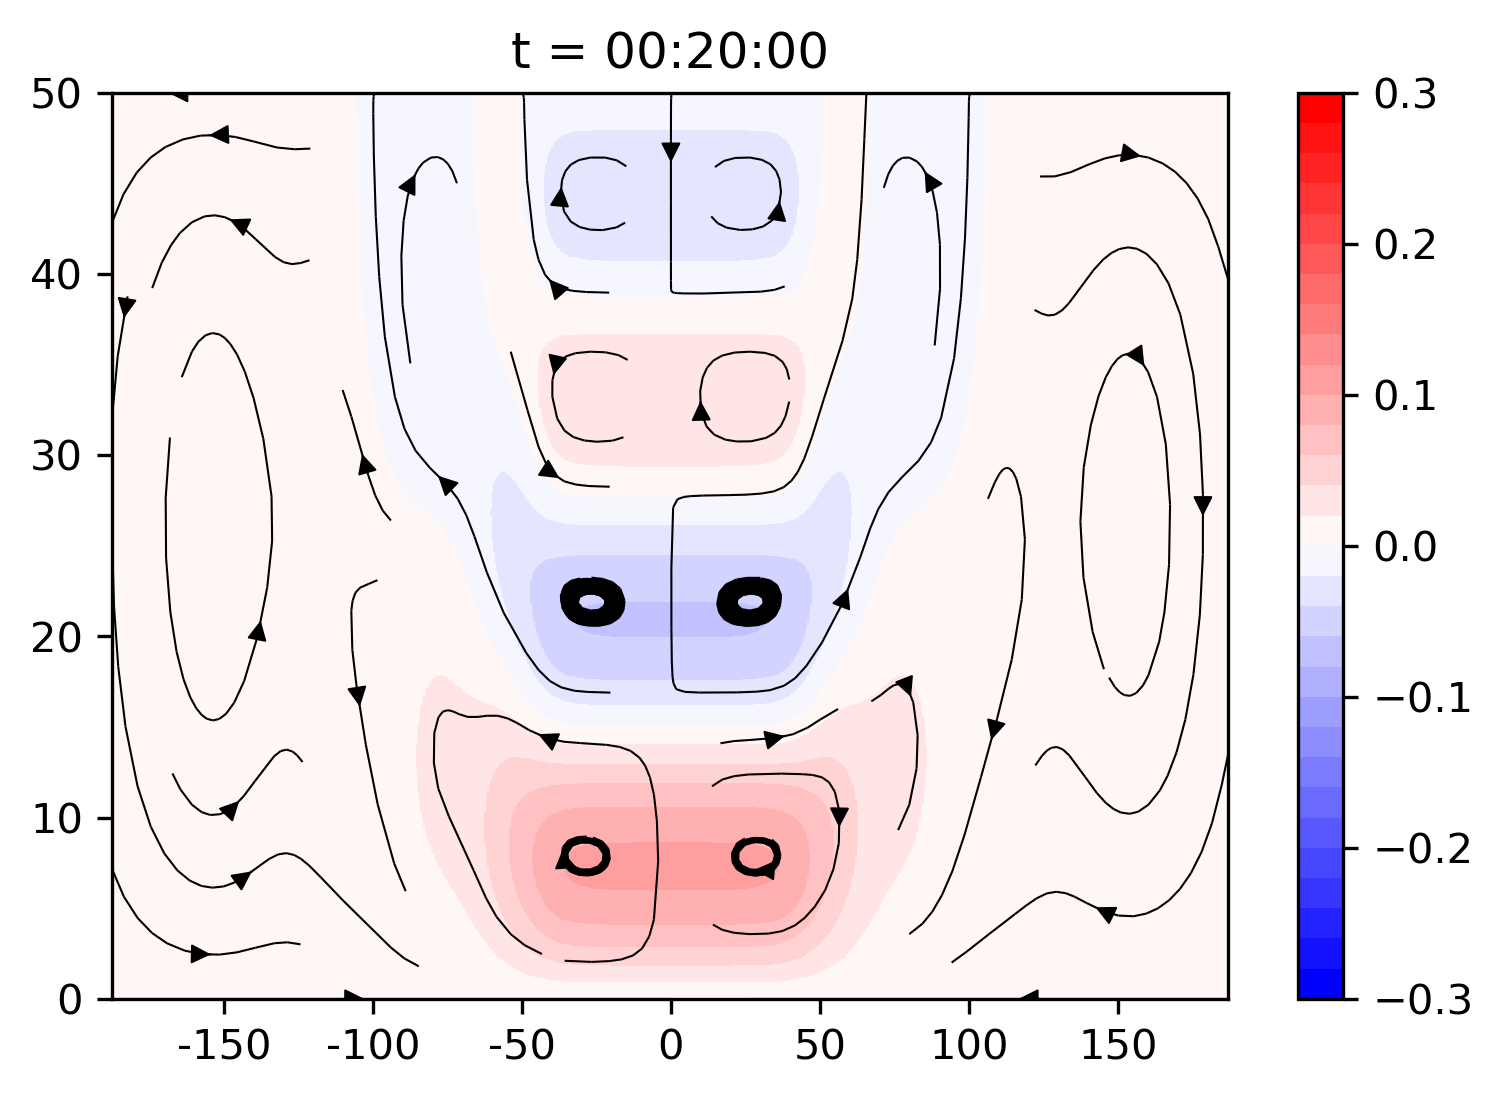

In [ ]:
from animate import animator, LineType

anim = animator()
time = 2

#anim.display_line(data=simulationData, time=time, lineType = LineType.U, prefix='U')
# anim.display_line(data=simulationData, time=time, lineType = LineType.V, prefix='V')
#anim.display_line(data=simulationData, time=time, lineType = LineType.W, prefix='W')
#anim.display_line(data=simulationData, time=time, lineType = LineType.B, prefix='B')
#anim.display_line(data=simulationData, time=time, lineType = LineType.P, prefix='P')

anim.display(data=sim1, t=time, prefix='Sim1 (last) ')

#anim.images(sim1, 'test', True)